<a href="https://colab.research.google.com/github/swathivenkatesan87/24ADI003-24BAD122-ML/blob/main/Exp_4_24bad122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SCENARIO 1 – MULTINOMIAL NAÏVE BAYES
Problem Statement
Classify SMS messages as Spam or Ham (Not Spam)..
Dataset (Kaggle – Public)
https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
Target Variable: Message Label (Spam / Ham)
Input Feature: SMS Text Messages
IN-LAB TASKS (Multinomial Naïve Bayes)
1. Import required Python libraries.
2. Load the SMS Spam dataset.
3. Perform data preprocessing:
• Text cleaning (lowercase, punctuation removal)
• Stopword removal (optional)
4. Convert text into numerical features using:
• Count Vectorization / TF-IDF
5. Encode target labels.
6. Split dataset into training and testing sets.
7. Train a Multinomial Naïve Bayes classifier.
8. Predict message classes.
9. Evaluate performance using:
• Accuracy
• Precision
• Recall
• F1 Score
10. Analyze misclassified examples.
11. Apply Laplace smoothing and observe impact.
Visualization
• Confusion Matrix
• Feature importance (Top words influencing spam classification)
• Word frequency comparison (Spam vs Ham)

Name: Swathi
Roll No: 24BAD122
Dataset Shape: (5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Feature matrix shape: (5572, 9229)
Label Encoding: {'ham': np.int64(0), 'spam': np.int64(1)}
Training samples: 4457
Testing samples: 1115

Accuracy: 0.967713004484305

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Number of Misclassified Messages: 36
Some misclassified indices: [  2 

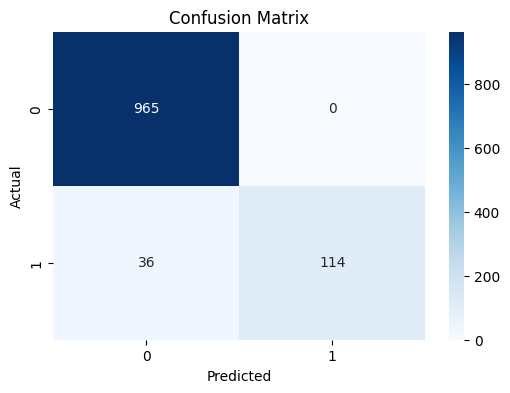

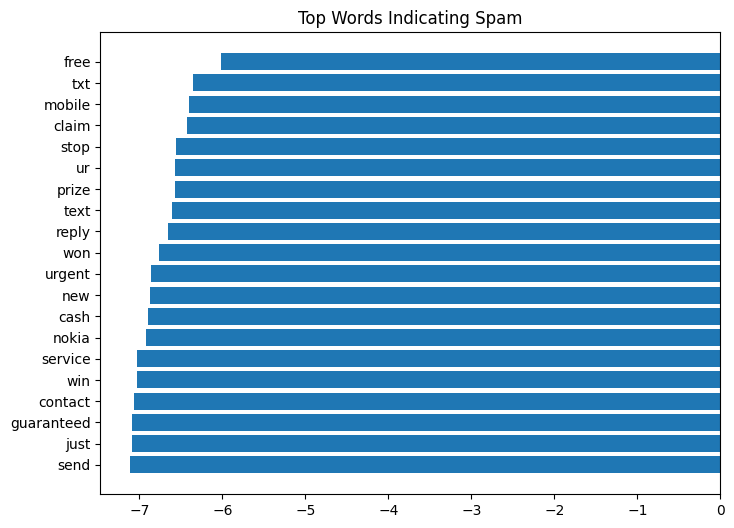


Total Spam Words: 11732
Total Ham Words: 36255


In [ ]:
# ---------------------------------------------
# NAME : SWATHI
# ROLL NO : 24BAD122
# SCENARIO 1 – MULTINOMIAL NAIVE BAYES
# SMS SPAM CLASSIFICATION
# ---------------------------------------------

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_extraction import text

# Step 2: Load dataset
# Download dataset from Kaggle and upload "spam.csv"
print("Name: Swathi")
print("Roll No: 24BAD122")
df = pd.read_csv("spam.csv", encoding='latin-1')

# Keep only required columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print("Dataset Shape:", df.shape)
print(df.head())


# Step 3: Data Preprocessing

# Function for text cleaning
def clean_text(msg):
    msg = msg.lower()   # lowercase
    msg = msg.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    return msg

df['message'] = df['message'].apply(clean_text)

# Stopword removal (optional)
stop_words = text.ENGLISH_STOP_WORDS

def remove_stopwords(msg):
    return " ".join([word for word in msg.split() if word not in stop_words])

df['message'] = df['message'].apply(remove_stopwords)


# Step 4: Convert text into numerical features (TF-IDF)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['message'])

print("Feature matrix shape:", X.shape)


# Step 5: Encode target labels
le = LabelEncoder()
y = le.fit_transform(df['label'])

# ham -> 0
# spam -> 1

print("Label Encoding:", dict(zip(le.classes_, le.transform(le.classes_))))


# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


# Step 7: Train Multinomial Naive Bayes
# Laplace smoothing alpha=1 (default)

model = MultinomialNB(alpha=1)
model.fit(X_train, y_train)


# Step 8: Prediction
y_pred = model.predict(X_test)


# Step 9: Evaluation

accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


# Step 10: Misclassified examples

misclassified = np.where(y_test != y_pred)

print("\nNumber of Misclassified Messages:", len(misclassified[0]))

test_messages = X_test[misclassified]
print("Some misclassified indices:", misclassified[0][:10])


# Step 11: Impact of Laplace smoothing

model2 = MultinomialNB(alpha=0.1)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print("\nAccuracy with alpha=0.1:",
      accuracy_score(y_test, y_pred2))



# VISUALIZATION


# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Feature Importance (Top Spam Words)

feature_names = np.array(vectorizer.get_feature_names_out())

# Get spam feature probabilities
spam_probs = model.feature_log_prob_[1]

top_spam = np.argsort(spam_probs)[-20:]

plt.figure(figsize=(8,6))
plt.barh(feature_names[top_spam], spam_probs[top_spam])
plt.title("Top Words Indicating Spam")
plt.show()


# Word Frequency Comparison (Spam vs Ham)

spam_messages = df[df['label'] == 'spam']['message']
ham_messages = df[df['label'] == 'ham']['message']

spam_words = " ".join(spam_messages).split()
ham_words = " ".join(ham_messages).split()

print("\nTotal Spam Words:", len(spam_words))
print("Total Ham Words:", len(ham_words))